In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',200)

In [2]:
train=pd.read_csv("kc_house_data.csv")
train.drop(['id'],axis=1,inplace=True)
train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


###Data Understand

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [4]:
train.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
#count types of data
list(set(train.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [6]:
#Chỉnh sữa kiểu dữ liệu bị
train['date']= pd.to_datetime(train['date'], format='%Y%m%dT%H%M%S')
train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df_num = train.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
#Kieểm tra duplicated
print(f'There are {train.duplicated().sum()} duplicated in this data')

There are 0 duplicated in this data


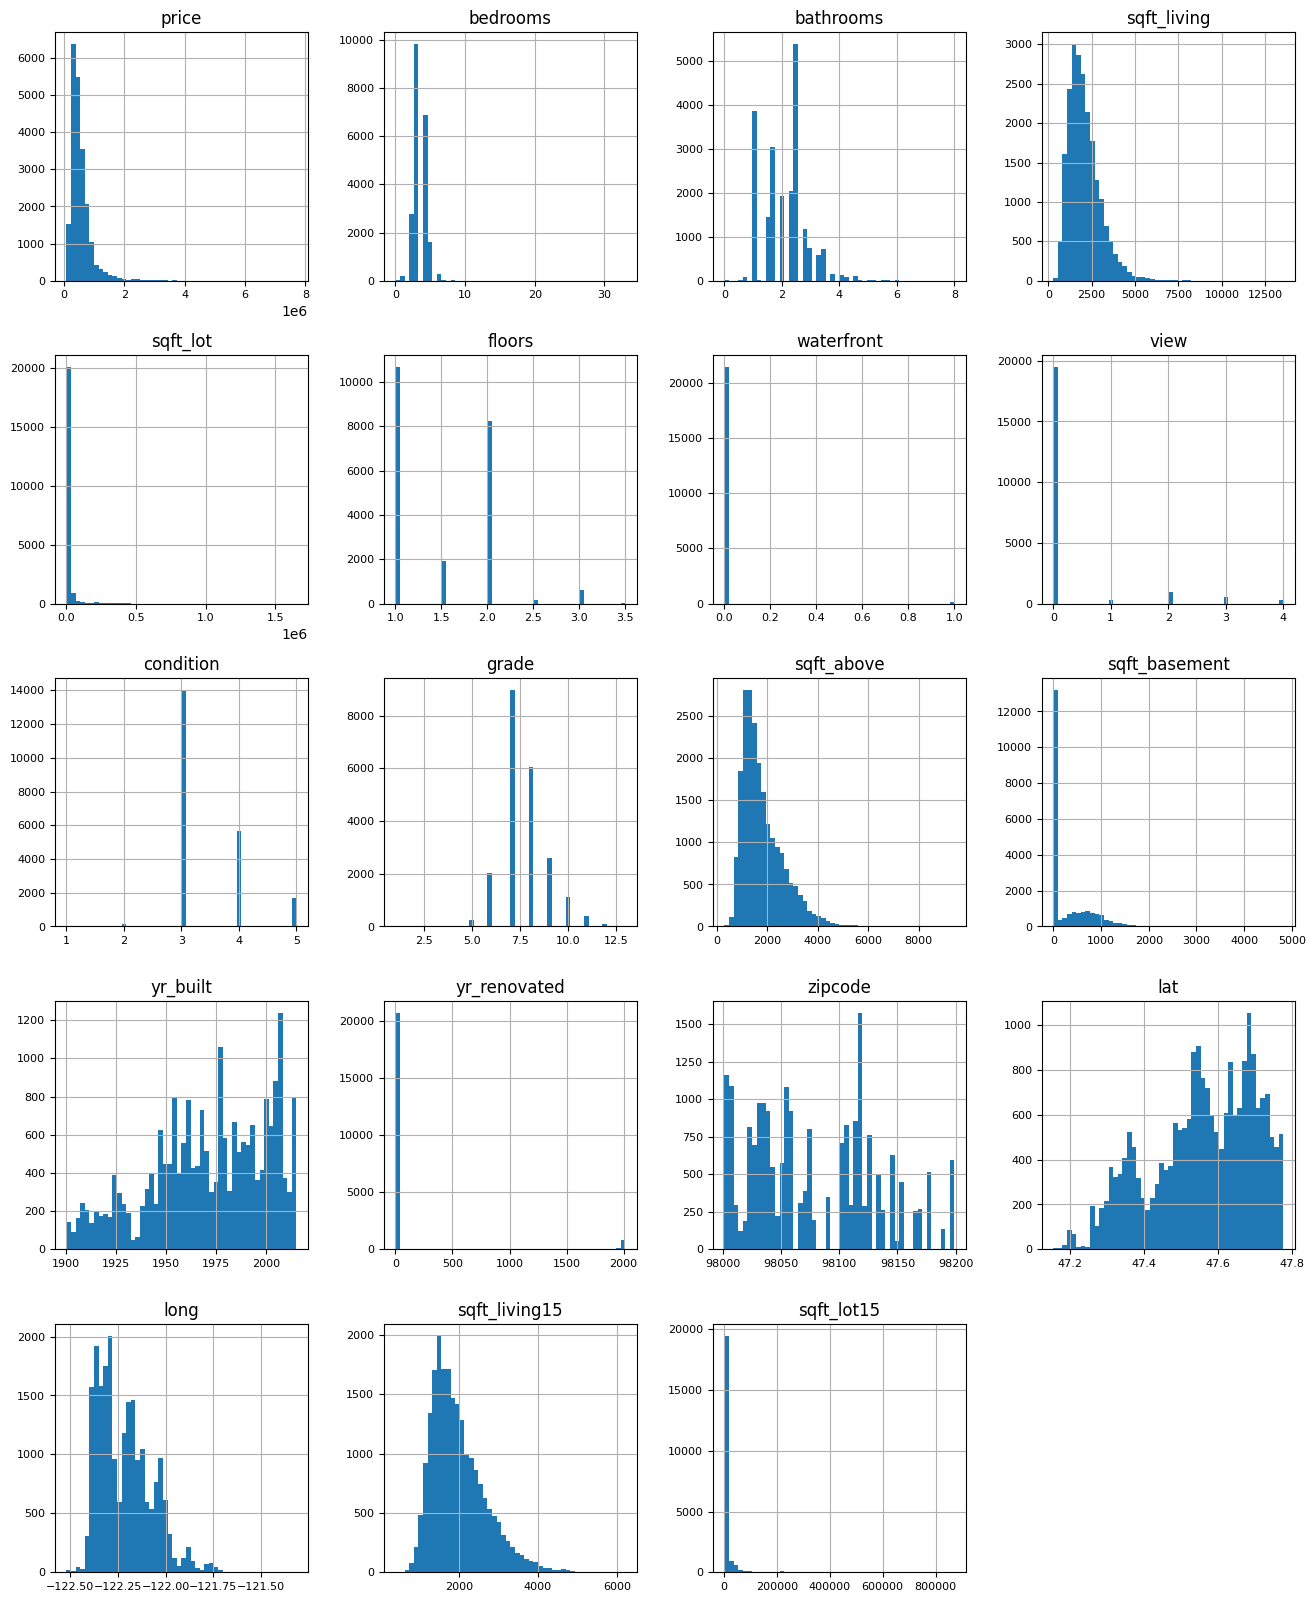

In [9]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

#Target Variable Analysis: Saleprice

###Descriptive Statistics

In [10]:
print("Skewness: %f" % train['price'].skew())

Skewness: 4.024069


####Đánh giá: Phương pháp skew giúp chúng ta nhận biết được độ lệch của dữ liệu.
- Nếu kết quả từ -0.5 đến 0.5: dữ liệu gần như đối xứng
- từ -1 đến 0.5: dữ liệu bị lệch âm
- từ 0.5 đến 1: dữ liệu bị dương
- Lớn hơn 1: dữ liệu hoàn toàn bị lệch

In [11]:
print('Descriptive Statistic')
print("----------------------")
train['price'].describe().round(2)

Descriptive Statistic
----------------------


count      21613.00
mean      540088.14
std       367127.20
min        75000.00
25%       321950.00
50%       450000.00
75%       645000.00
max      7700000.00
Name: price, dtype: float64

### Histogram

C:\Users\Asus\AppData\Local\Temp\ipykernel_18408\2874632440.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['price'])


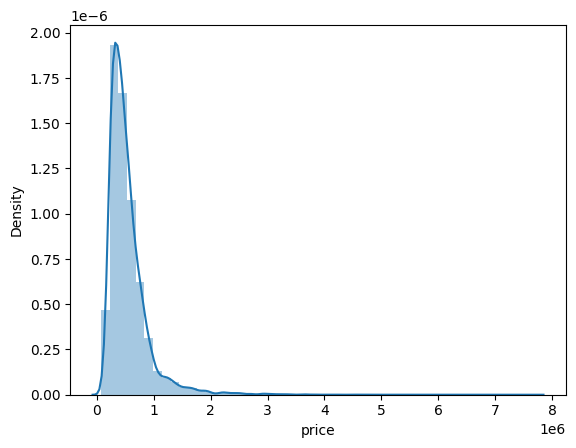

In [12]:
sns.distplot(train['price'])
plt.show()

###Đánh giá: dữ liệu price đã bị lệch bên phải



# Đánh giá các giá trị độc lập và biến price với nhau

In [13]:
train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


1. Question 1: bedrooms và bathrooms có mối quan hệ gì với giá price
2. Question 2: sqft_living có mối quan hệ với price hoặc ảnh hưởng đến price hay ko.
3. Question 3: price và yr_built có tác động lẫn nhau hay không
4. Question 4: grade và price có tác động lẫn nhau hay không
5. Question 5: sqft_basement và price có tác động lẫn nhau hay không

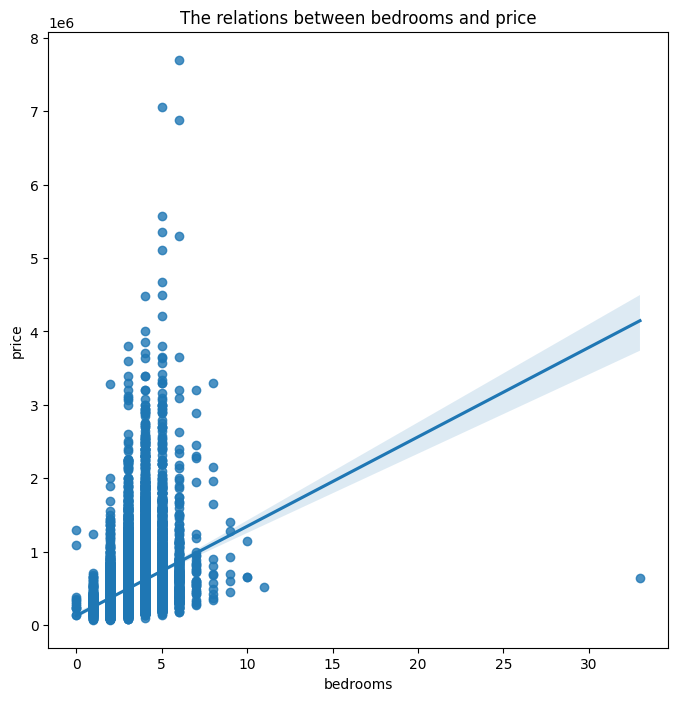

In [14]:
#Question 1.
plt.figure(figsize=(8,8))
sns.regplot(data=train,x='bedrooms',y='price')
plt.title('The relations between bedrooms and price')
plt.show()

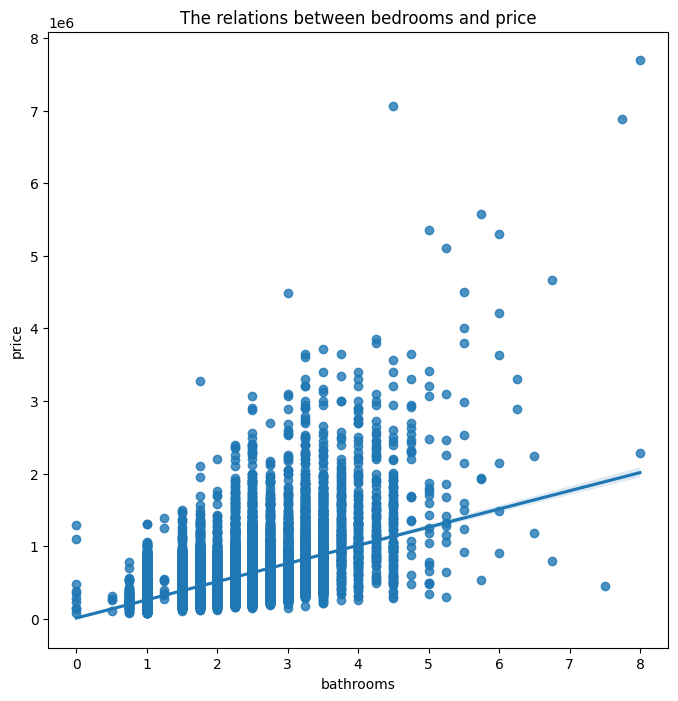

In [15]:
plt.figure(figsize=(8,8))
sns.regplot(data=train,x='bathrooms',y='price')
plt.title('The relations between bedrooms and price')
plt.show()

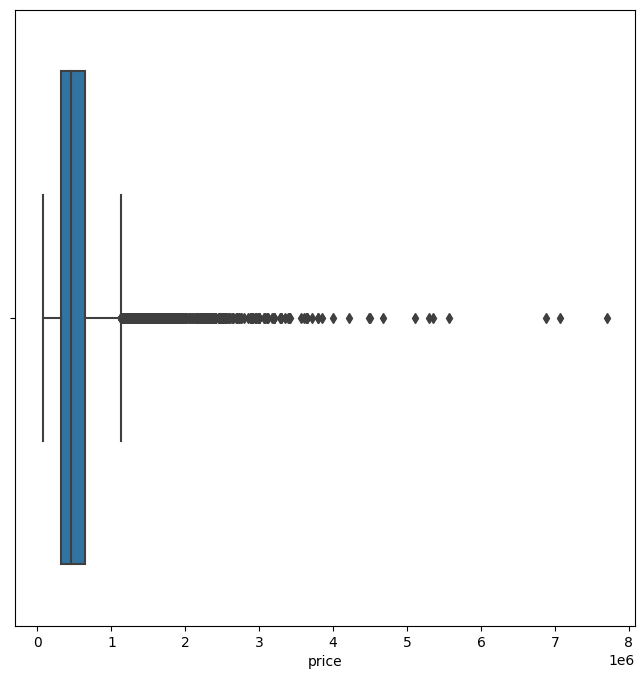

In [16]:
plt.figure(figsize=(8,8))
sns.boxplot(data=train,x='price')
plt.title('')
plt.show()

##đánh giá: giữa bedroom,bathroom và price có mối quan hệ tuyến tính với nhau

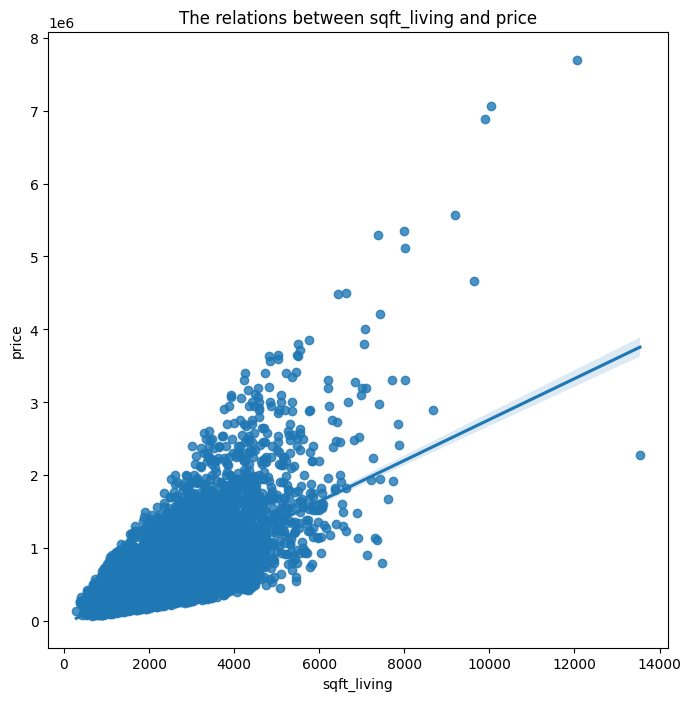

In [17]:
plt.figure(figsize=(8,8))
sns.regplot(data=train,x='sqft_living',y='price')
plt.title('The relations between sqft_living and price')
plt.show()

###đánh giá: sqft_living và price có mối quan hệ tuyến tính với nhau. Nhưng xuất hiện outliner

<Axes: xlabel='yr_built', ylabel='price'>

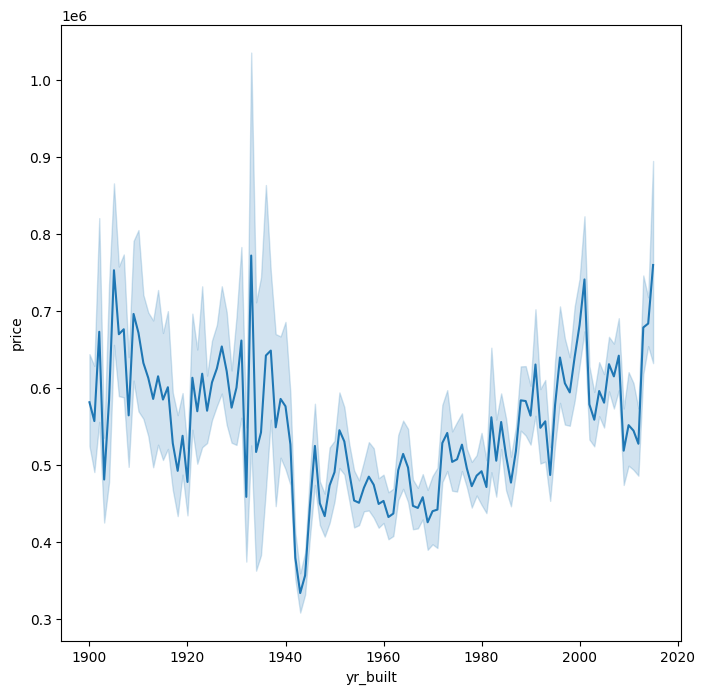

In [18]:
plt.figure(figsize=(8,8))
sns.lineplot(data=train,x='yr_built',y='price')

###Đánh giá: Dựa vào biểu đồ trên có thể thấy được yr_built có ảnh hưởng đến price qua từng năm xây dựng hoặc bán nhà. Trước năm 1960, giá bán nhà có xu hưởng tăng giảm không đồng đều, sau năm 1960 giá nhà có chiều hướng tăng mạnh

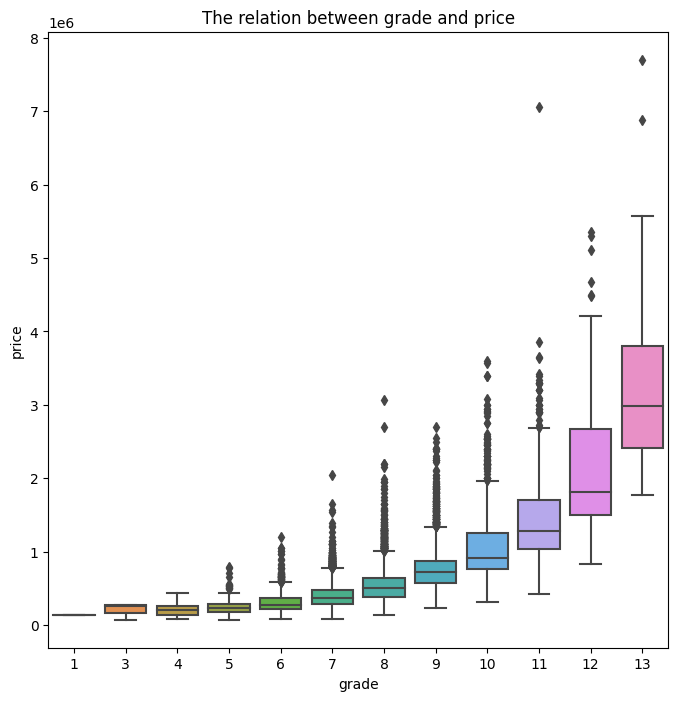

In [19]:
plt.figure(figsize=(8,8))
sns.boxplot(data=train,x='grade',y='price')
plt.title('The relation between grade and price')
plt.show()

###đánh giá: ta  thấy rằng nếu grade càng cao thì price càng tăng

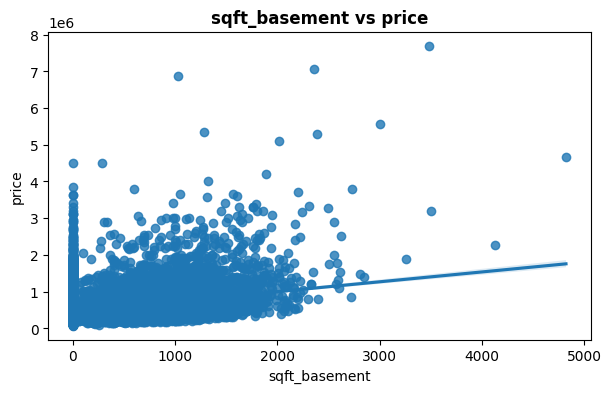

In [20]:
plt.figure(figsize=(7,4))
sns.regplot(data=train, x='sqft_basement', y='price')
plt.title('sqft_basement vs price', fontweight='bold')

plt.show()

- Heatmap corr

In [21]:
def heatmap(dataset, label = None):
    corr = dataset.corr()
    plt.figure(figsize = (14, 10), dpi = 300)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask = mask, cmap = 'viridis', annot = True, annot_kws = {'size' : 7})
    plt.title(f'{label} Dataset Correlation Matrix\n', fontsize = 25, weight = 'bold')
    plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_18408\2911764856.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


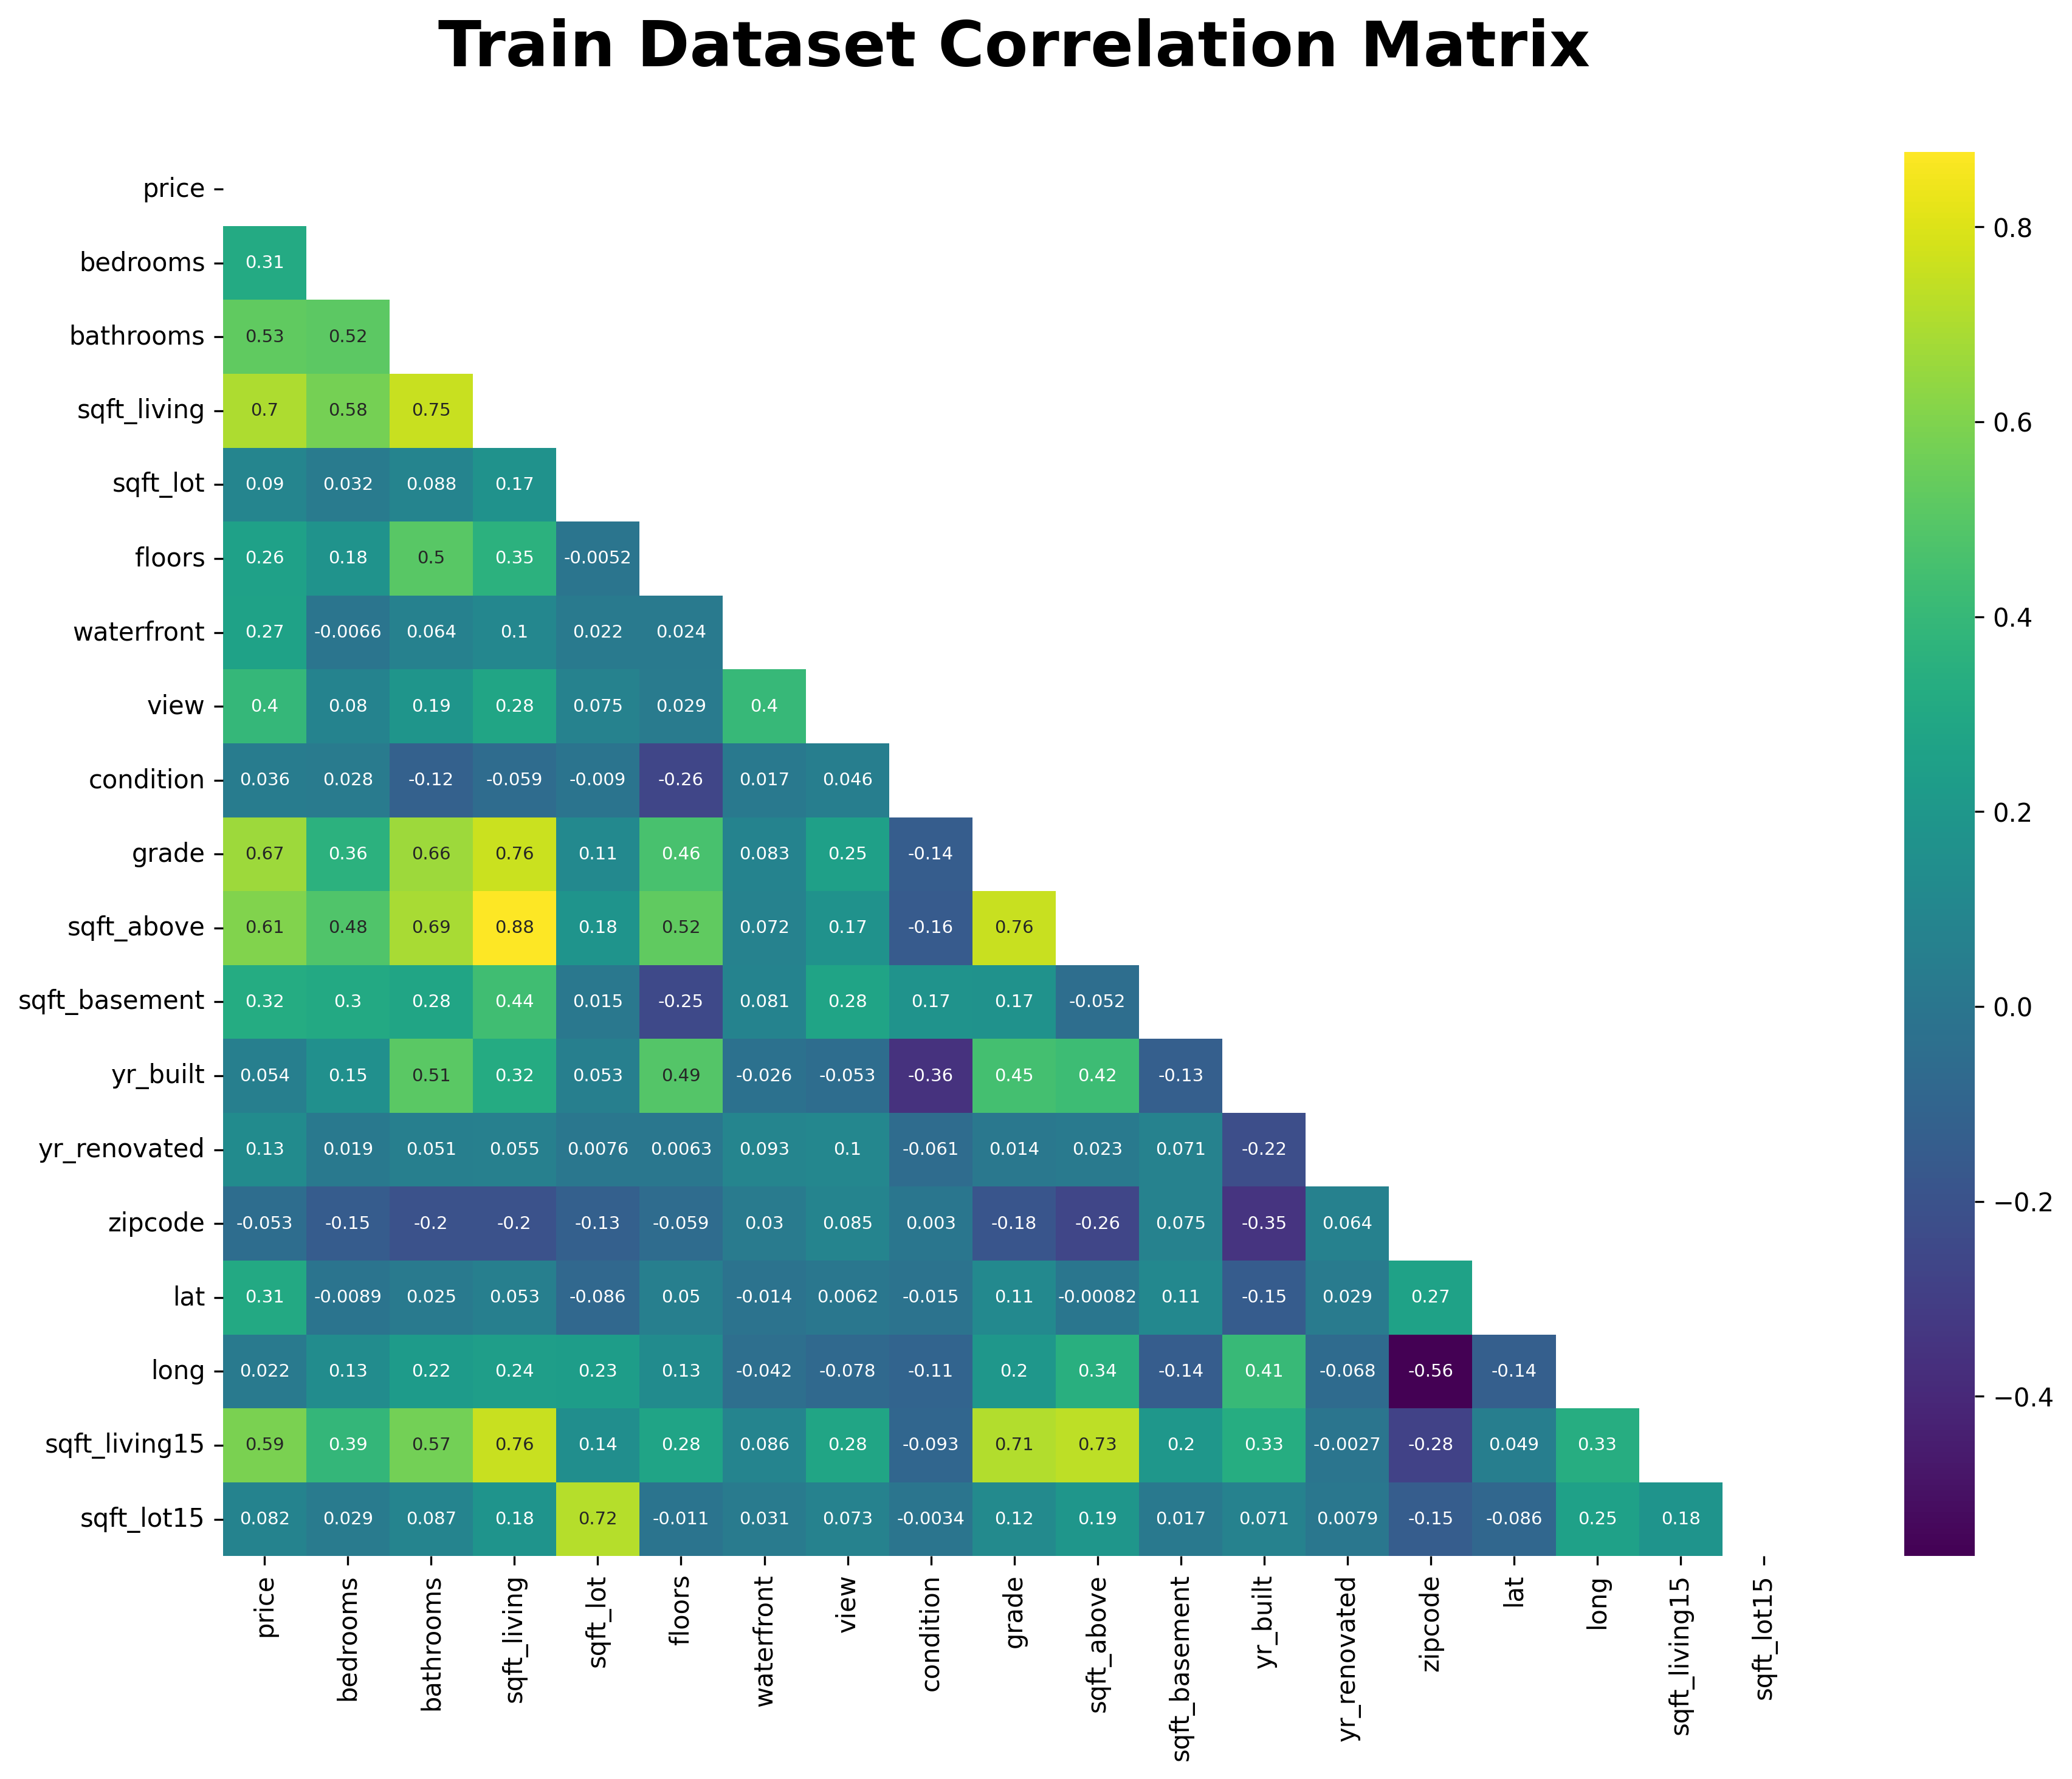

In [22]:
heatmap(train, 'Train')

###Đánh giá: Chúng ta thấy giữa sqft_basement và price lại có tương quan nhau, nhưng có khác nhiều zeros values. Có thể ảnh hưởng để khả năng predict của model


### Nhận xét toàn bộ: chúng ta thấy rằng sau khi phân tích thì ta có thể thấy được tất cả các cột trên có chỉ số tương quan khá cao đối với cột price. Ngoài ra chúng ta đã thấy được 3 điểm outlier có thể gây ảnh hưởng đến kết quả predict của model nên chúng ta sẽ loại bỏ nó và biến cột price thành phân phối chuẩn

##Transformation Data

####Loại bỏ 3 điểm outlier

In [23]:
#Xác định ba điểm cần bỏ
train.sort_values(by='price', ascending=False).head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,2014-06-11,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730


In [24]:
#Xoá cột cần loại bỏ
train = train.drop(train[train['price'] == 7700000].index)
train = train.drop(train[train['price'] == 7062500].index)
train = train.drop(train[train['price'] == 6885000].index)

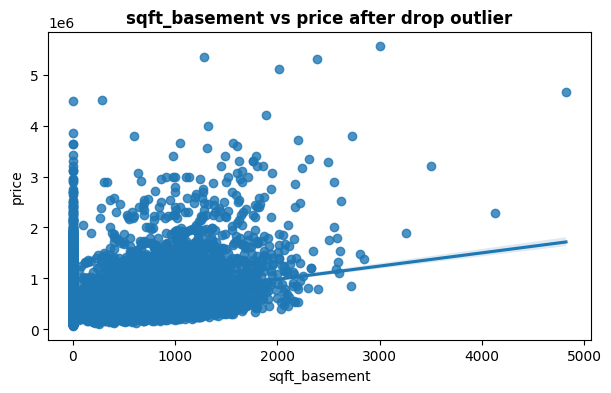

In [25]:
#vẽ lại để kiểm tra xem outlier để bị drop chưa
plt.figure(figsize=(7,4))
sns.regplot(data=train, x='sqft_basement', y='price')
plt.title('sqft_basement vs price after drop outlier', fontweight='bold')

plt.show()

###Transform data

In [26]:
from scipy import stats
from scipy.stats import norm

#Price columns

C:\Users\Asus\AppData\Local\Temp\ipykernel_18408\1510675020.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['price']);


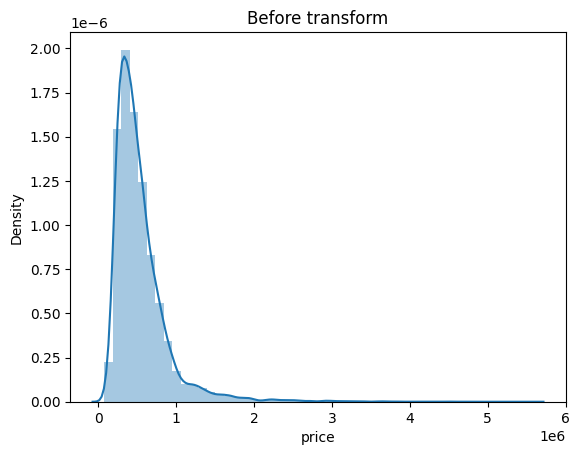

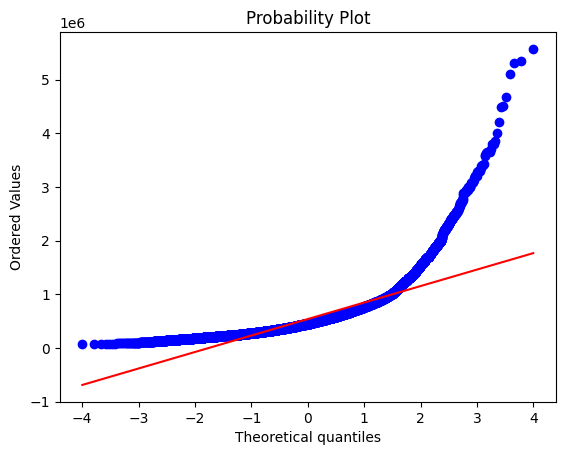

In [27]:
plt.title('Before transform')
sns.distplot(train['price']);
fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)

C:\Users\Asus\AppData\Local\Temp\ipykernel_18408\3139669378.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['price']);


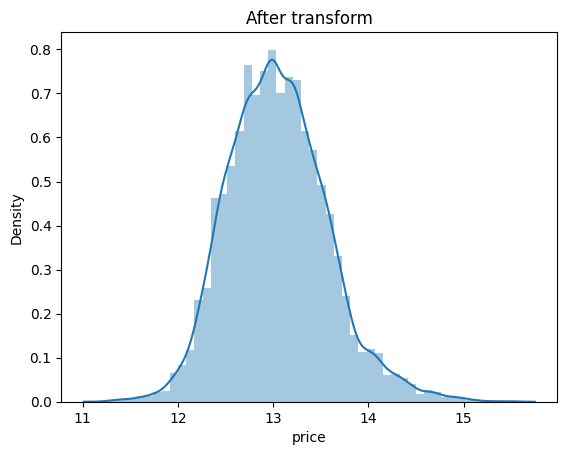

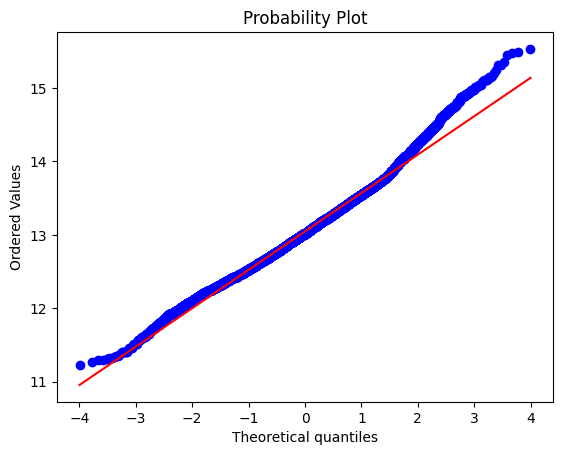

In [28]:
train[['price']]= train[['price']].apply(np.log1p)
plt.title('After transform')
sns.distplot(train['price']);
fig = plt.figure()
res = stats.probplot(train['price'], plot=plt)

#sqft_living columns

C:\Users\Asus\AppData\Local\Temp\ipykernel_18408\587783407.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['sqft_living']);


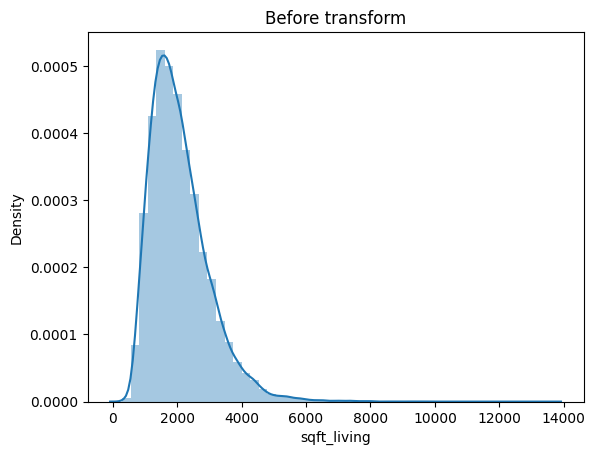

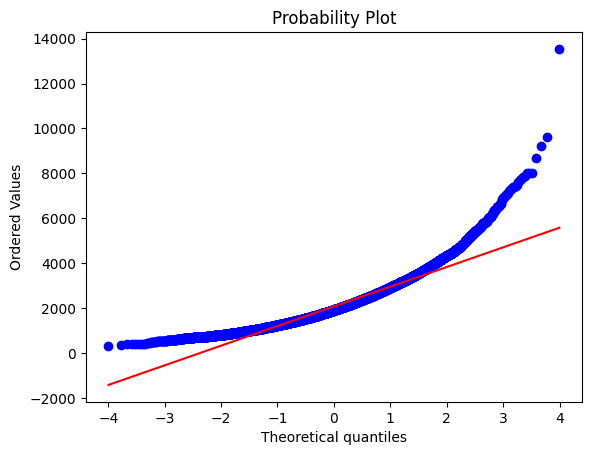

In [29]:
plt.title('Before transform')
sns.distplot(train['sqft_living']);
fig = plt.figure()
res = stats.probplot(train['sqft_living'], plot=plt)

C:\Users\Asus\AppData\Local\Temp\ipykernel_18408\3989292482.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['sqft_living']);


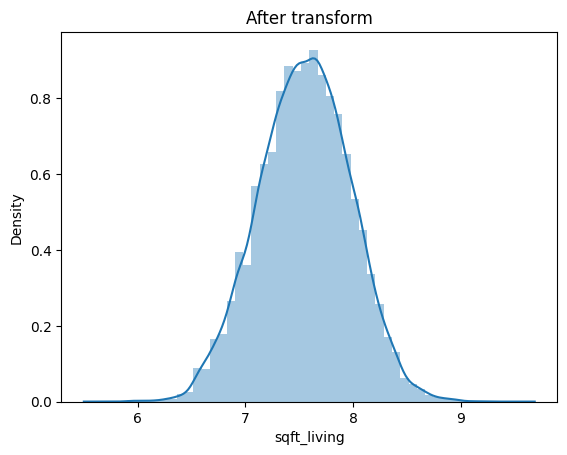

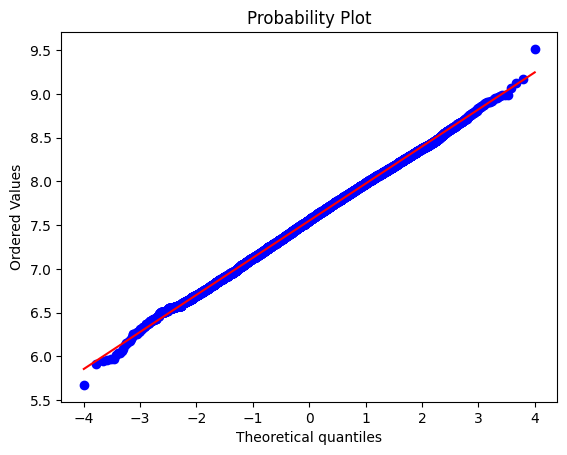

In [30]:
train[['sqft_living']]= train[['sqft_living']].apply(np.log1p)
plt.title('After transform')
sns.distplot(train['sqft_living']);
fig = plt.figure()
res = stats.probplot(train['sqft_living'], plot=plt)

C:\Users\Asus\AppData\Local\Temp\ipykernel_18408\1079314846.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['sqft_basement'], fit=norm);


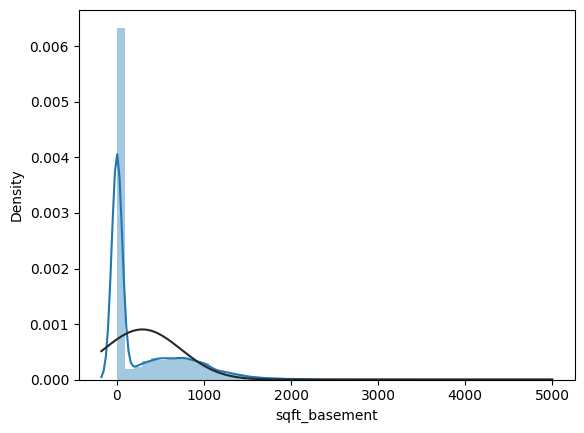

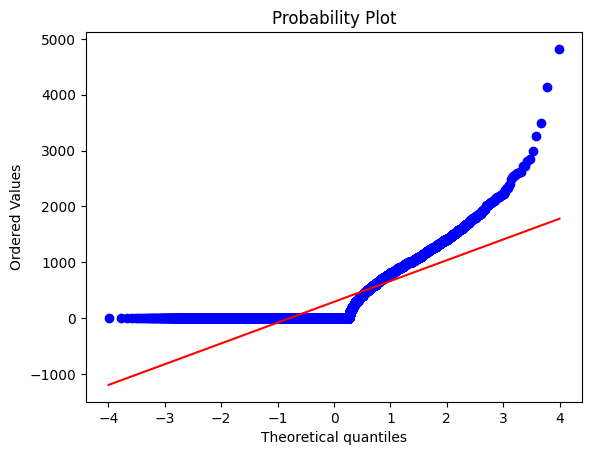

In [31]:
sns.distplot(train['sqft_basement'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['sqft_basement'], plot=plt)

### Đánh giá vì có quá nhiều zeros value nên làm cho columns bất đối xứng và khó có thể dùng log transform để đưa về normalize. Vì vậy cần loại bỏ số 0 bằng cách sử dụng binary classified.
- Với những số lớn hơn không thì ta đánh dấu là 1, còn bé hơn hoặc bằng 0 ta sẽ đánh dấu bằng không. Và tạo 1 cột mới tên là basement

In [32]:
train['basement'] = pd.Series(len(train['sqft_basement']), index=train.index)
train['basement'] = 0 
train.loc[train['sqft_basement']>0,'basement'] = 1

In [33]:
train.loc[train['basement']==1,'sqft_basement'] = np.log(train['sqft_basement'])

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\Asus\AppData\Local\Temp\ipykernel_18408\916902806.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[train['sqft_basement']>0]['sqft_basement'], fit=norm);


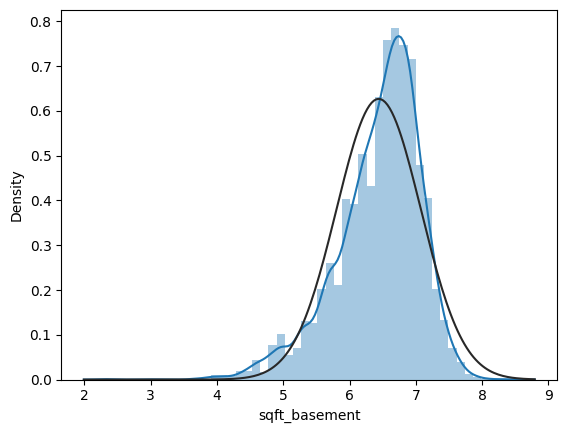

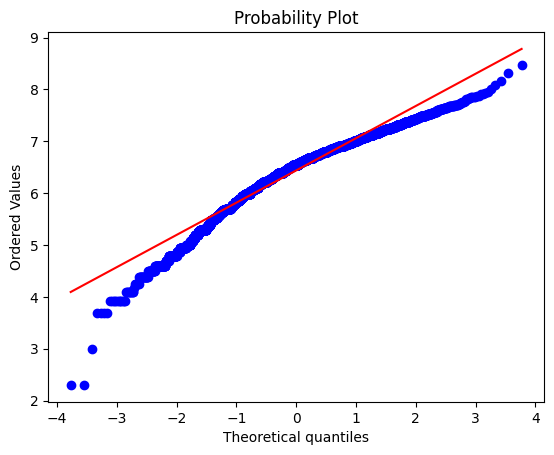

In [34]:
sns.distplot(train[train['sqft_basement']>0]['sqft_basement'], fit=norm);
fig = plt.figure()
res = stats.probplot(train[train['sqft_basement']>0]['sqft_basement'], plot=plt)

##Model

In [35]:
train.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement
0,2014-10-13,12.309987,3,1.00,7.074117,5650,1.0,0,0,3,7,1180,0.000000,1955,0,98178,47.5112,-122.257,1340,5650,0
1,2014-12-09,13.195616,3,2.25,7.852050,7242,2.0,0,0,3,7,2170,5.991465,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,2015-02-25,12.100718,2,1.00,6.647688,10000,1.0,0,0,3,6,770,0.000000,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2014-12-09,13.311331,4,3.00,7.581210,5000,1.0,0,0,5,7,1050,6.813445,1965,0,98136,47.5208,-122.393,1360,5000,1
4,2015-02-18,13.142168,3,2.00,7.427144,8080,1.0,0,0,3,8,1680,0.000000,1987,0,98074,47.6168,-122.045,1800,7503,0


In [36]:
train.drop(['date','zipcode'],axis=1,inplace=True)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [38]:
std_scaller = StandardScaler()
new_data =  std_scaller.fit_transform(train.values)
new_train = pd.DataFrame(new_data, columns=train.columns)


In [39]:
new_train

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,basement
0,-1.402760,-0.398543,-1.450612,-1.123696,-0.228251,-0.915301,-0.086909,-0.305538,-0.629183,-0.558884,-0.736810,-0.797571,-0.545039,-0.209903,-0.352478,-0.306107,-0.943510,-0.260640,-0.803959
1,0.281858,-0.398543,0.176928,0.710638,-0.189818,0.936727,-0.086909,-0.305538,-0.629183,-0.558884,0.463963,1.092871,-0.681231,4.751756,1.161590,-0.746345,-0.432521,-0.187795,1.243844
2,-1.800826,-1.474164,-1.450612,-2.129196,-0.123234,-0.915301,-0.086909,-0.305538,-0.629183,-1.410551,-1.234100,-0.797571,-1.294093,-0.209903,1.283552,-0.135692,1.071246,-0.172303,-0.803959
3,0.501969,0.677079,1.153452,0.072008,-0.243944,-0.915301,-0.086909,-0.305538,2.444199,-0.558884,-0.894487,1.352224,-0.204560,-0.209903,-0.283198,-1.271791,-0.914311,-0.284446,1.243844
4,0.180192,-0.398543,-0.148580,-0.291273,-0.169587,-0.915301,-0.086909,-0.305538,-0.629183,0.292783,-0.130359,-0.797571,0.544494,-0.209903,0.409607,1.199225,-0.271925,-0.192776,-0.803959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21605,-0.482346,-0.398543,0.502436,-0.511666,-0.337348,2.788755,-0.086909,-0.305538,-0.629183,0.292783,-0.312294,-0.797571,1.293548,-0.209903,1.004987,-0.938062,-0.666116,-0.412300,-0.803959
21606,-0.281933,0.677079,0.502436,0.459245,-0.224316,0.936727,-0.086909,-0.305538,-0.629183,0.292783,0.633769,-0.797571,1.463788,-0.209903,-0.356086,-1.051672,-0.228126,-0.203873,-0.803959
21607,-0.271968,-1.474164,-1.776120,-1.466965,-0.332061,0.936727,-0.086909,-0.305538,-0.629183,-0.558884,-0.930875,-0.797571,1.293548,-0.209903,0.247953,-0.604333,-1.410700,-0.394062,-0.803959
21608,-0.281933,-0.398543,0.502436,-0.406248,-0.307002,0.936727,-0.086909,-0.305538,-0.629183,0.292783,-0.227391,-0.797571,1.123309,-0.209903,-0.184328,1.028810,-0.841313,-0.420431,-0.803959


In [40]:
X= new_train.drop(['price'],axis=1)
y= new_train['price']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

In [42]:
from sklearn.metrics import r2_score

In [43]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}


param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids = {}
best_scores = {}  

for model_name, model in models.items():
    print(f'Training and tuning {model_name}...')
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids[model_name].fit(X_train, y_train)
    best_params = grids[model_name].best_params_
    
    best_model = grids[model_name].best_estimator_
    y_pred = best_model.predict(X_test)
    best_score = r2_score(y_test, y_pred)
    
    best_scores[model_name] = best_score  # Save the best score
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best R^2 score for {model_name}: {best_score}\n')

Training and tuning LinearRegression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LinearRegression: {}
Best R^2 score for LinearRegression: 0.7888321497662101

Training and tuning RandomForest...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 500}
Best R^2 score for RandomForest: 0.8959123820749032

Training and tuning XGBoost...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Best R^2 score for XGBoost: 0.9092541662721079



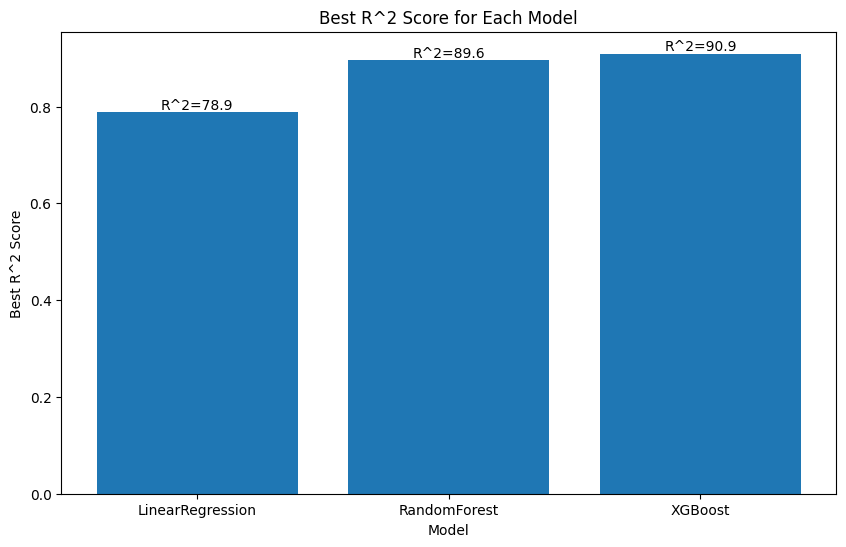

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(best_scores.keys(), best_scores.values())
plt.xlabel('Model')
plt.ylabel('Best R^2 Score')
plt.title('Best R^2 Score for Each Model')
for model_name, score in best_scores.items():
    plt.text(model_name, score, f'R^2={score*100:.1f}', ha='center', va='bottom')


plt.show()